#### Problem Statement

There is a real estate agent who knows that you are a Machine Learning Engineer and would like you to help build a machine learning model that can predict the price of the house given the information about that particular house.
The idea of creating a model clicked and you replied, "oh yeah, that sounds cool! Let's do it!"
You have understood the problem and probably you already have an idea of the type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, you eventually settled for Linear Regression as this is not a complex problem.

Data Set: https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing

Task: Build a Linear Regression Model for House Price prediction.

I expect to see the following:


- Data Vizualization & EDA
- Data Preprocessing
- Building A Machine Learning Model & Making Predictions using either (sklearn or the manual approach)
- Evaluate Performance Of Your Regression Model Using RMSE (Root Mean Squared Error)



1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea



Submission Deadline: 16th October 2022.

Feel free to get in touch with me should you have any questions or need clarity on the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlretrieve

In [2]:
datas= pd.read_csv('testing.csv')
datas.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
#remove rows with any values that are not finite
datas_new = datas[np.isfinite(datas).all(1)]

#view updated DataFrame
print(datas_new)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [95]:
datas_new.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [96]:
datas_new.dropna()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    4  
1                    4  
2                    4  
3                    4  
4                    4  
...                ...  
20635                2  
20636                2  
20637                2  
20638                2  
20639                2  

[20433 rows x 10 columns]

In [97]:
datas_new.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
20635                2  
20636                2  
20637                2  
20638                2  
20639                2

In [12]:
datas_new.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [98]:
datas_new.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  ocean_proximity  
count        20433.000000     20433.000000  
mean        206864.413155         1.909411  
std         115435.667099         1.004574  
min          14999.000000         1.000000  
25%         119500.000000         1.000000  
50%         179700.000000         2.000000  
75%         264700.000000         2.000000  
max         500001.000000         5.000000

In [99]:
datas_new.describe().transpose()

count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0       3.871162       1.899291      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   
ocean_proximity     20433.0       1.909411       1.004574      1.0000   

                            25%          50%         75%          max  
longitude             -121.8000    -118.4900    -118.010    -114.3100  
latitude                33.9300      34.2600      37.720      41.9500  
housing_median_age      18.0000      29.0000      37.000      52.0000  
total_rooms           1450.0000    2127.0000    3143.000   39320.0000  
total_bedrooms         296.0000     435.0000     647.000    6445.0000  
population             787.0000    1166.0000    1722.000   35682.0000  
households             280.0000     409.0000     604.000    6082.0000  
median_income            2.5637       3.5365       4.744      15.0001  
median_house_value  119500.0000  179700.0000  264700.000  500001.0000  
ocean_proximity          1.0000       2.0000       2.000       5.0000

In [100]:
datas_new.shape

(20433, 10)

In [16]:
datas_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [101]:
datas_new['ocean_proximity'].value_counts()

1    9034
2    6496
3    2628
4    2270
5       5
Name: ocean_proximity, dtype: int64

#### 1)let us know how far the houses are from the the north and south pole of the equator,by checking the longitude and latitudes

In [103]:
datas_new[['longitude','latitude']].value_counts()

longitude  latitude
-122.41    37.80       15
-122.44    37.78       11
-122.42    37.80       11
-122.27    37.85       10
-122.44    37.79       10
                       ..
-120.69    35.64        1
           35.65        1
           36.84        1
           37.40        1
-114.31    34.19        1
Length: 12507, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

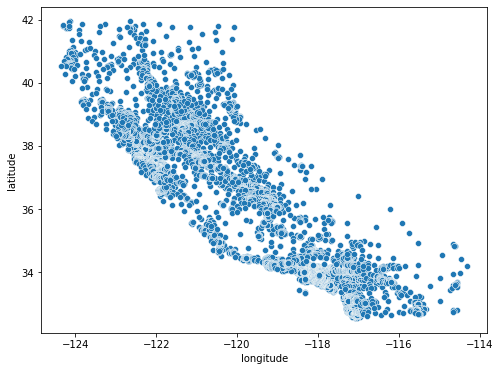

In [104]:
plt.figure(figsize=(8,6))
markers = {1:'P', 2:'X', 3:'D'} # P, X, and D are markers
sns.scatterplot(data=datas_new, x='longitude', y='latitude',markers=markers)

from our observation,when there is reduction in latitude there is an increase in longitude

### we want to know the age range in respect to density

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

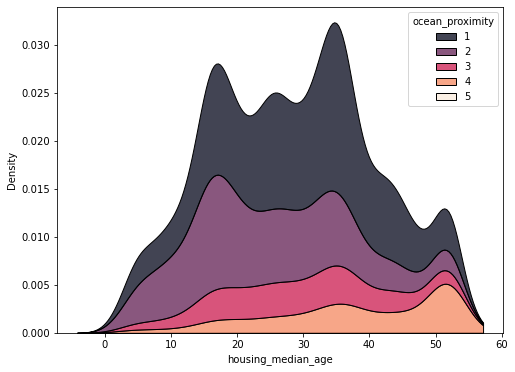

In [105]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=datas_new, x='housing_median_age', hue='ocean_proximity',palette = 'rocket',multiple='stack')

from the graph above, at the age of 40,the density is at its peak,meaning that there are a lot of people whose ages are 40
that are into housing.this could be due to experiences of affordability for that age group

### let us find out the no of bedrooms in the houses in relation to frequency and age

In [106]:
datas_new['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

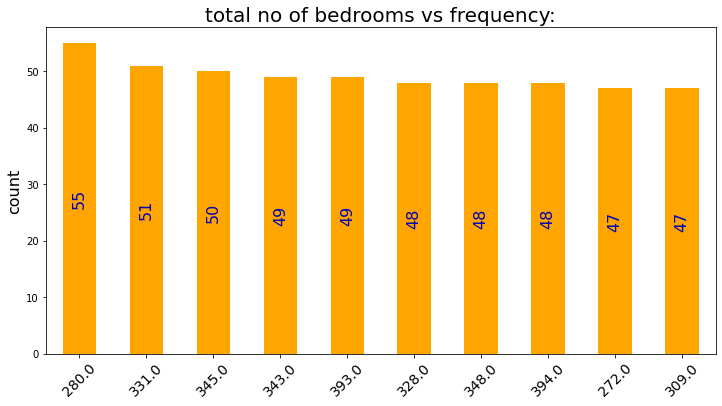

In [107]:
plt.figure(figsize=(12, 6))
ax = datas_new['total_bedrooms'].value_counts().head(10).plot(kind = 'bar',color = 'orange')
plt.title('total no of bedrooms vs frequency:', fontsize = 20)
plt.ylabel('count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 16, rotation = 90, color = '#0000b3')
plt.show()

with respect to age,we have more people at 47 years of agewho have over 40 rooms.The number of people at age 55 
are few in respect to the number of rooms they have

In [108]:
fig = px.histogram(datas_new,x='total_bedrooms',marginal='box',nbins=50,title='total bedrooms vs freq')
fig.update_layout(bargap=0.1)
fig.show()

### relating total_bedrooms with total_rooms and population.

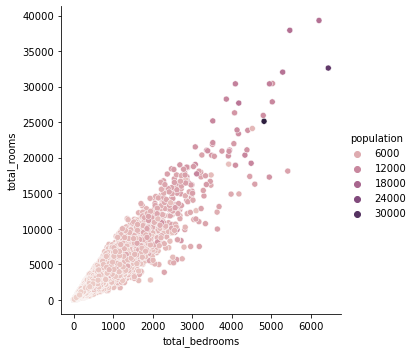

In [109]:
sns.relplot(x='total_bedrooms', y='total_rooms',hue='population', data=datas_new);

this observation,there are fewer people with more number of bedrooms and total rooms.we observed that less people have more bedrooms and total_rooms,while more people have less rooms and less bedrooms,this could be as a result of factors such as income

### Median income vs ocean proximity, we want to know how income affects the choice of house in relation to the ocean proximity

In [110]:
fig = px.histogram(datas_new,x='median_income',marginal='box',color='ocean_proximity',nbins=50,color_discrete_sequence=['fuchsia'],
                   title ='median_income vs ocean_proximity')


fig.update_layout(bargap=0.5)
fig.show()

the higher the income the closer it is to ocean proximity.then when the median imncome increases btween 3.76-15.25,there
is a decline in demand for houses close to ocean proximity. this means income is not a criteria. its based on prference 
of the individual.

### Determine how income affects the value of house the people decided to go for. 

<Figure size 1296x720 with 0 Axes>

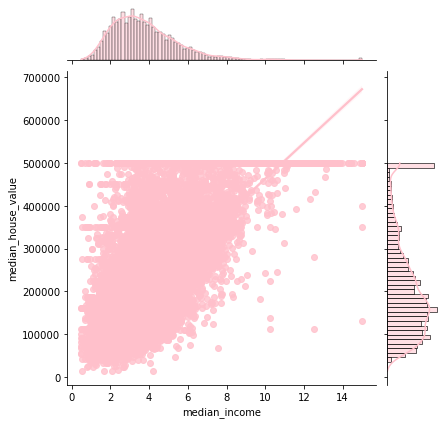

In [111]:
plt.figure(figsize=(18,10))

sns.jointplot(data=datas_new, x='median_income', y='median_house_value',color = "pink", kind='reg')

the value of housing is mostly determined by income when the income is high, the house value is 5000000 .

### find out the ages of people renting or buying houses in that region

In [112]:
datas['housing_median_age'].value_counts()


52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

In [113]:
datas_new['housing_median_age'].head()


0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64

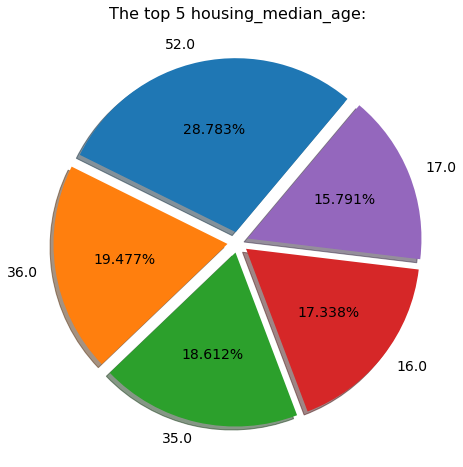

In [114]:
plt.figure(figsize= (18,8))
plt.pie(datas_new['housing_median_age'].value_counts().head(5), labels=datas['housing_median_age'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
        explode= [0.06]*5, shadow= True, startangle= 50, autopct= '%1.3F%%')
plt.title ( 'The top 5 housing_median_age:', fontsize= 16)
plt.show()

in respect to the pie chat above,a higher percentage at 52 years buy houses in that region,while at age 35-36 they are in high demand also

### let us know if the age affects the type of house people go for based on the value they get e.g comfort.

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

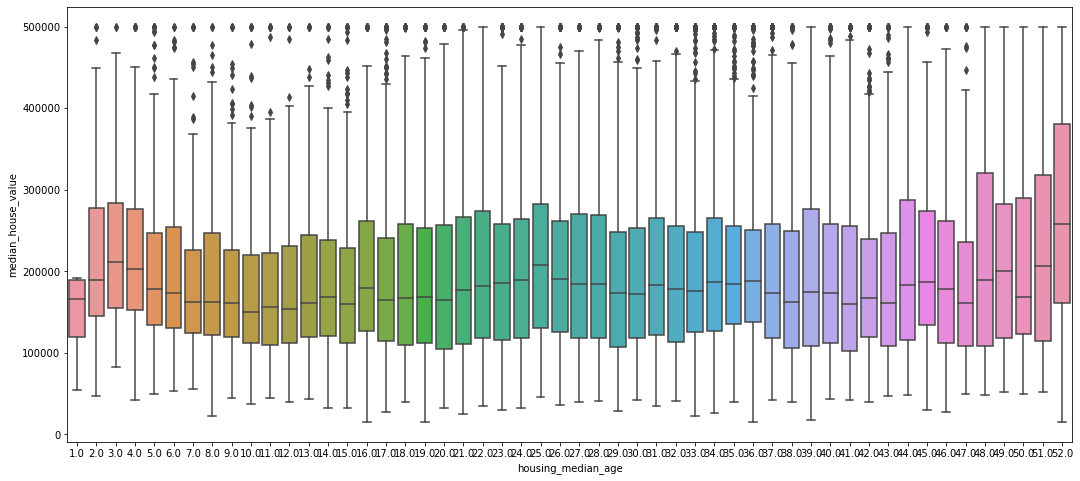

In [115]:
plt.figure(figsize= (18,8))
sns.boxplot(data=datas_new, x='housing_median_age', y='median_house_value')

comparing the age with value. the higher the age the higher the value. it means the older people know alot more about housing values

### lets find the  population of people with respect to their choices of bedrooms

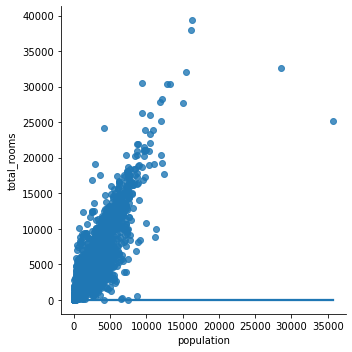

In [32]:
sns.lmplot(x='population', y='total_rooms', data=datas_new, logistic=True, y_jitter=0.03)

from the above scatterplot,fewer people buy less rooms. 

### let relate ocean_proximity with population

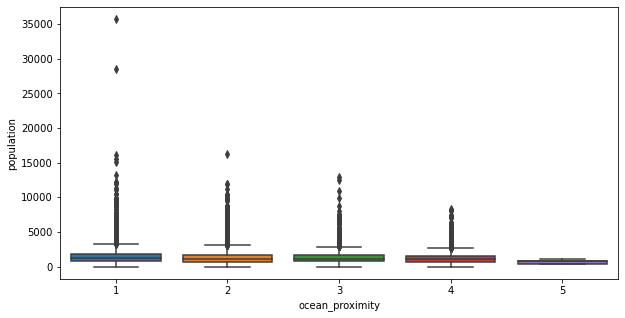

In [116]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'ocean_proximity', y = 'population', data = datas_new)
plt.show()

there is an increase in demand for ocean proximity in relation to the population. more people want to live closer to the ocean

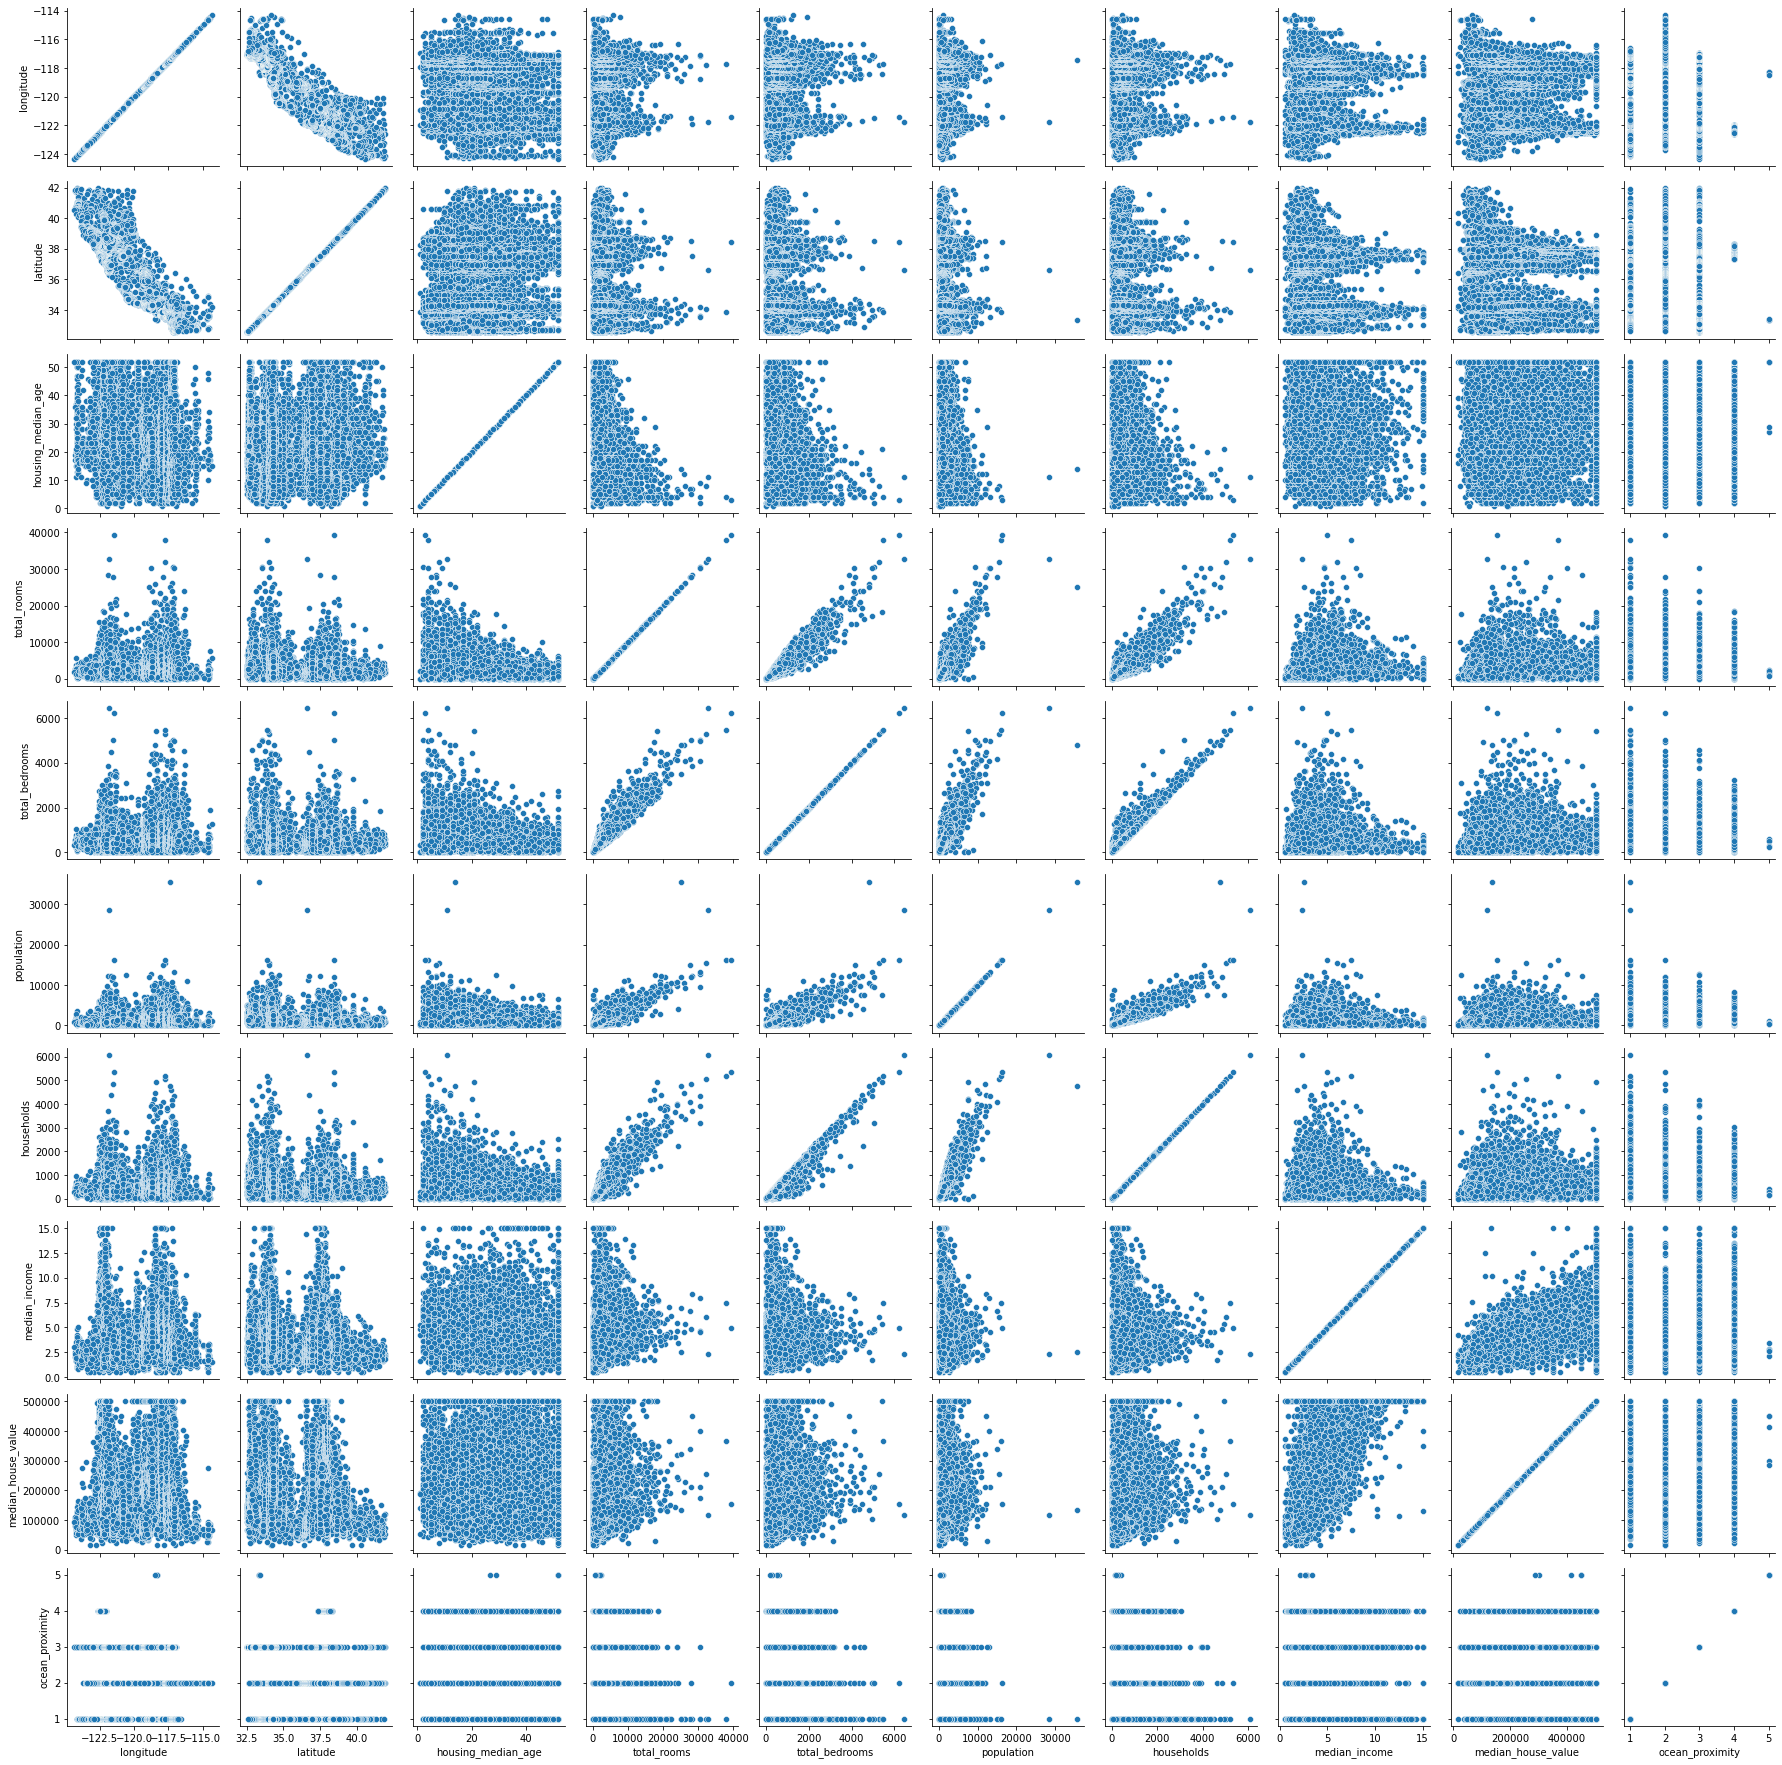

In [117]:
plot = sns.PairGrid(datas_new) 
plot.map(sns.scatterplot)

### lets get the datas that are missing

### missing data

<AxesSubplot:>

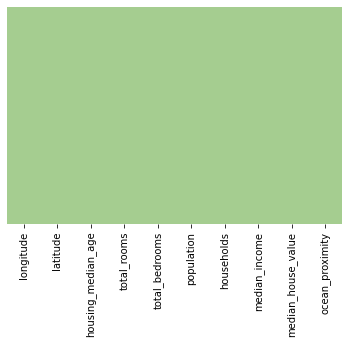

In [118]:
sns.heatmap(datas_new.isnull(),yticklabels=False,cbar = False,cmap ='crest')

### lets look into how these various parts of the houses and people correlate

In [119]:
correlation = datas_new.corr()
correlation

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity     -0.439787  0.390885            0.145469    -0.016174   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   
ocean_proximity          -0.021466   -0.083097   -0.027488      -0.039270   

                    median_house_value  ocean_proximity  
longitude                    -0.045398        -0.439787  
latitude                     -0.144638         0.390885  
housing_median_age            0.106432         0.145469  
total_rooms                   0.133294        -0.016174  
total_bedrooms                0.049686        -0.021466  
population                   -0.025300        -0.083097  
households                    0.064894        -0.027488  
median_income                 0.688355        -0.039270  
median_house_value            1.000000         0.020952  
ocean_proximity               0.020952         1.000000

<AxesSubplot:>

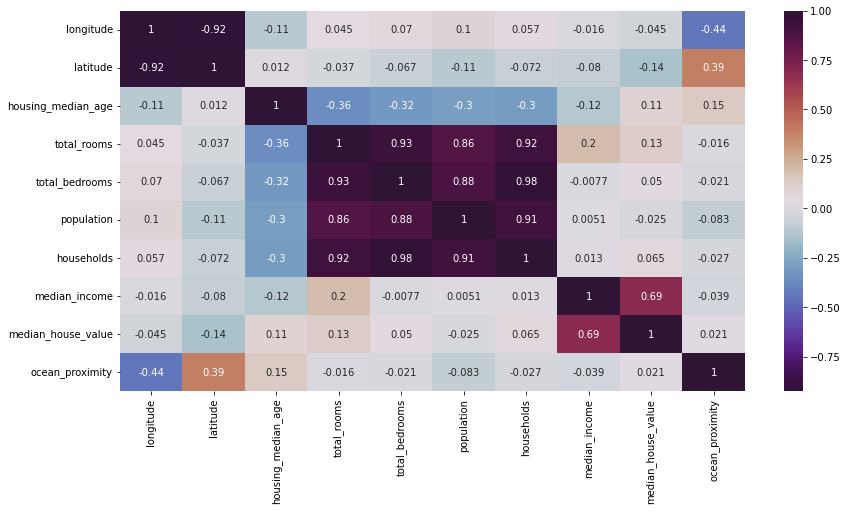

In [120]:
plt.figure(figsize=(14,7))

sns.heatmap(correlation, annot=True, cmap='twilight_shifted')

1 is a major sign of perfect correlation,longitude,latitude,median_age,total_rooms are in perfect correlation 

### DATA PREPROCESSING

### Problem Statement
There is a real estate agent who knows that you are a Machine Learning Engineer and would like you to help build a machine learning model that can predict the price of the house given the information about that particular house. The idea of creating a model clicked and you replied, "oh yeah, that sounds cool! Let's do it!" You have understood the problem and probably you already have an idea of the type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, you eventually settled for Linear Regression as this is not a complex problem.
Data Set: https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing
Task: Build a Linear Regression Model for House Price prediction.

I expect to see the following:

- Data Vizualization & EDA
- Data Preprocessing
- Building A Machine Learning Model & Making Predictions using either (sklearn or the manual approach)
- Evaluate Performance Of Your Regression Model Using RMSE (Root Mean Squared Error)
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median_house_value: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea


In [121]:
train = pd.read_csv('https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing')
test = pd.read_csv('https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing')

In [122]:
train = train.dropna(thresh=0.70*len(train), axis=1)

test = test.dropna(thresh=0.70*len(test), axis=1)

In [123]:
datas_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [124]:
input_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
target_col ='median_house_value'

In [125]:
train_input = datas_new[input_col].copy()
train_target= datas_new[target_col]

### selecting numerical and categorical features

In [126]:
num_col =['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
          'median_income','median_house_value']
cat_col =['ocean_proximity']

### encoding the categorical features

In [127]:
num_col =['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
          'median_income','median_house_value']
cat_col =['ocean_proximity']

In [128]:
from sklearn.preprocessing import OneHotEncoder

In [129]:
encoder = OneHotEncoder(sparse= False, handle_unknown='ignore')

In [130]:
encoder.fit(train_input[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [131]:
encoded_col = list(encoder.get_feature_names_out(cat_col))


In [132]:
train_input[encoded_col] = encoder.transform(train_input[cat_col])

In [133]:
datas_new[['ocean_proximity']].value_counts()



ocean_proximity
1                  9034
2                  6496
3                  2628
4                  2270
5                     5
dtype: int64

In [134]:
train_data = train_input[num_col + encoded_col]

In [135]:
train_input

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  ocean_proximity_1  ocean_proximity_2  \
0                    4                0.0                0.0   
1                    4                0.0                0.0   
2                    4                0.0                0.0   
3                    4                0.0                0.0   
4                    4                0.0                0.0   
...                ...                ...                ...   
20635                2                0.0                1.0   
20636                2                0.0                1.0   
20637                2                0.0                1.0   
20638                2                0.0                1.0   
20639                2                0.0                1.0   

       ocean_proximity_3  ocean_proximity_4  ocean_proximity_5  
0                    0.0                1.0                0.0  
1                    0.0                1.0                0.0  
2                    0.0                1.0                0.0  
3                    0.0                1.0                0.0  
4                    0.0                1.0                0.0  
...                  ...                ...                ...  
20635                0.0                0.0                0.0  
20636                0.0                0.0                0.0  
20637                0.0                0.0                0.0  
20638                0.0                0.0                0.0  
20639                0.0                0.0                0.0  

[20433 rows x 15 columns]

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler()

In [138]:
train_input[num_col] = scaler.fit_transform(train_input[num_col])

### Merging back scaled numeric and encoded categorical features

In [139]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_1  ocean_proximity_2  ocean_proximity_3  ocean_proximity_4  \
0                0.0                0.0                0.0                1.0   
1                0.0                0.0                0.0                1.0   
2                0.0                0.0                0.0                1.0   
3                0.0                0.0                0.0                1.0   
4                0.0                0.0                0.0                1.0   

   ocean_proximity_5  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [143]:
px.histogram(train_input,  x='ocean_proximity',marginal='box',title= 'ocean', color_discrete_sequence=['orange'])

In [144]:
from sklearn.linear_model import LinearRegression


In [145]:
train_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  ocean_proximity_1  ocean_proximity_2  \
count        20433.000000       20433.000000       20433.000000   
mean        206864.413155           0.442128           0.317917   
std         115435.667099           0.496652           0.465678   
min          14999.000000           0.000000           0.000000   
25%         119500.000000           0.000000           0.000000   
50%         179700.000000           0.000000           0.000000   
75%         264700.000000           1.000000           1.000000   
max         500001.000000           1.000000           1.000000   

       ocean_proximity_3  ocean_proximity_4  ocean_proximity_5  
count       20433.000000       20433.000000       20433.000000  
mean            0.128615           0.111095           0.000245  
std             0.334782           0.314257           0.015641  
min             0.000000           0.000000           0.000000  
25%             0.000000           0.000000           0.000000  
50%             0.000000           0.000000           0.000000  
75%             0.000000           0.000000           0.000000  
max             1.000000           1.000000           1.000000

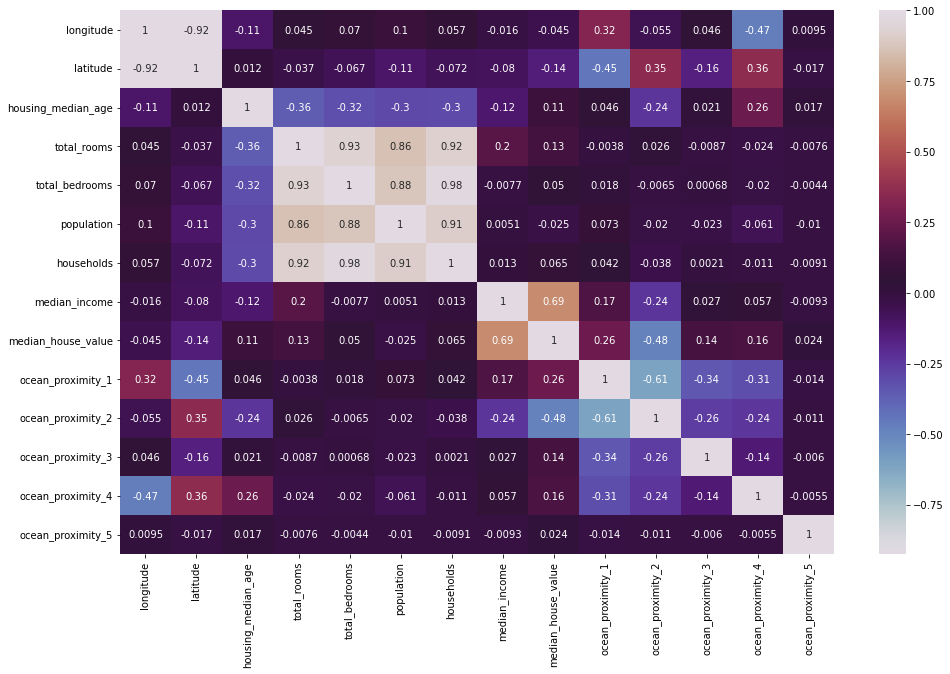

In [146]:
plt.figure(figsize = (16, 10))
sns.heatmap(train_data.corr(), annot = True, cmap="twilight")
plt.show()

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X=train_data
y=train_target

In [149]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [150]:
print(f'The length of the train set is{len(X_train)}\nThe length of the validation set is {len(X_test)}')

The length of the train set is16346
The length of the validation set is 4087


In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
model=LinearRegression()

In [153]:
model.fit(X_train, y_train) # Train the model

LinearRegression()

In [154]:
y_preds=model.predict(X_test)

In [155]:
model.intercept_ 

3.14321368932724e-09

In [156]:
model.coef_ # These are the slope (model coefficients) which is also reffered to as the weights

array([ 3.31638258e-11,  3.21445093e-11, -1.34815786e-12,  1.32012457e-14,
       -2.52803854e-13,  3.66269515e-14,  6.05904216e-14, -4.58510382e-11,
        1.00000000e+00, -1.57028042e-10, -1.53657106e-10, -1.55298161e-10,
       -1.61389610e-10,  6.27372919e-10])

In [157]:
feature_importance =pd.DataFrame({'Features':train_data.columns, 'Weights':model.coef_})
feats_df = feature_importance.sort_values(by=['Weights'], ascending=False)#sortingin descending order
feats_df

Features       Weights
8   median_house_value  1.000000e+00
13   ocean_proximity_5  6.273729e-10
0            longitude  3.316383e-11
1             latitude  3.214451e-11
6           households  6.059042e-14
5           population  3.662695e-14
3          total_rooms  1.320125e-14
4       total_bedrooms -2.528039e-13
2   housing_median_age -1.348158e-12
7        median_income -4.585104e-11
10   ocean_proximity_2 -1.536571e-10
11   ocean_proximity_3 -1.552982e-10
9    ocean_proximity_1 -1.570280e-10
12   ocean_proximity_4 -1.613896e-10

In [158]:
fig=px.bar(feats_df, x='Features', y='Weights', color_discrete_sequence=['green'], title='FeatureImportance',)
fig.update_layout(bargap=0.1)
fig.show()

In [159]:
from sklearn.metrics import mean_squared_error as MSE

In [160]:
MSE(y_test, y_preds, squared=False)

7.284814067153227e-11

### from our observation , the error is 3.97 meaning our model is perfectly fitted.

In [161]:
def get_rmse(X_train, Y_train, X_test, Y_test):
    train_pred=model.predict(X_train)
    test_pred=model.predict (X_test)
    
    rmse_train=np.sqrt(MSE(y_train,train_pred))
    rmse_test=np.sqrt(MSE(y_test, test_pred))
    
    print('Train Set RMSE:{}'.format(rmse_train))
    print('Test Set RMSE:{}'.format(rmse_test))

In [162]:
get_rmse(X_train, y_train, X_test, y_test)

Train Set RMSE:7.26145417289192e-11
Test Set RMSE:7.284814067153227e-11


### Problem Statement
There is a real estate agent who knows that you are a Machine Learning Engineer and would like you to help build a machine learning model that can predict the price of the house given the information about that particular house. The idea of creating a model clicked and you replied, "oh yeah, that sounds cool! Let's do it!" You have understood the problem and probably you already have an idea of the type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, you eventually settled for Linear Regression as this is not a complex problem. Data Set: https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing Task: Build a Linear Regression Model for House Price prediction.
- I expect to see the following:
- Data Vizualization & EDA
- Data Preprocessing
- Building A Machine Learning Model & Making Predictions using either (sklearn or the manual approach)
- Evaluate Performance Of Your Regression Model Using RMSE (Root Mean Squared Error)
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median_house_value: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea

In [163]:
datas_new['median_house_value'].mean()

206864.41315519012

In [164]:
datas_new['longitude'].mean()

-119.57068859198068

In [165]:
datas_new['latitude'].mean()

35.63322125972706

In [166]:
datas_new['housing_median_age'].mean()

28.633093525179856

In [167]:
datas_new['total_rooms'].mean()

2636.5042333480155

In [168]:
datas_new['total_bedrooms'].mean()

537.8705525375618

In [169]:
datas_new['population'].mean()

1424.9469485635982

In [170]:
datas_new['households'].mean()

499.43346547251997

In [171]:
datas_new['median_income'].mean()

3.8711616013312273